---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Cátedra de Investigación Operativa__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

In [16]:
import pulp
import numpy as np
import matplotlib.pyplot as plt

## Verificación de shadow price como variables duales

In [4]:
# Verificación de precios sombra
lp01 = pulp.LpProblem("Precios sombra", pulp.LpMinimize)

# Variables:
y_1 = pulp.LpVariable('y_1', lowBound=0, cat='Continuous')
y_2 = pulp.LpVariable('y_2', lowBound=0, cat='Continuous')

# Función objetivo:
lp01 += 734*y_1 + 523*y_2, "Z"

# Restricciones:
lp01 +=  100*y_1 + 47*y_2 >= 21
lp01 +=  63*y_1 + 84*y_2 >= 33

lp01.solve()
pulp.LpStatus[lp01.status]
print(pulp.LpStatus[lp01.status])

for variable in lp01.variables():
    print("%s = %.5f" % (variable.name, variable.varValue))
print(pulp.value(lp01.objective))

Optimal
y_1 = 0.03916
y_2 = 0.36349
218.84776386400003


## Análisis de sensibilidad en PuLP

### Cálculo de shadow price desde problema Primal

In [9]:
lp01 = pulp.LpProblem("Primal", pulp.LpMaximize)

# Variables:
x_1 = pulp.LpVariable('x_1', lowBound=0, cat='Continuous')
x_2 = pulp.LpVariable('x_2', lowBound=0, cat='Continuous')

# Función objetivo:
lp01 += 21*x_1 + 33*x_2, "Z"

# Restricciones:
lp01 +=  100*x_1 + 63*x_2 <= 734
lp01 +=  47*x_1 + 84*x_2 <= 523

lp01.solve()

# Sensitivity Analysis
print("\nAnálisis de sensibilidad:")
for name, c in lp01.constraints.items():
    print(f"Restricción: {name}, Shadow Price: {c.pi}")


Análisis de sensibilidad:
Restricción: _C1, Shadow Price: 0.039161611
Restricción: _C2, Shadow Price: 0.36348593


## Grid Search

In [33]:
# Cargamos el problema como una función, y dejamos libres las variables b_1 y b_2:
def problema_optimizacion(b_1, b_2):
    
    lp01 = pulp.LpProblem("Primal", pulp.LpMaximize)

    # Variables:
    x_1 = pulp.LpVariable('x_1', lowBound=0, cat='Continuous')
    x_2 = pulp.LpVariable('x_2', lowBound=0, cat='Continuous')

    # Función objetivo:
    lp01 += 21*x_1 + 33*x_2, "Z"

    # Restricciones:
    lp01 +=  100*x_1 + 63*x_2 <= b_1
    lp01 +=  47*x_1 + 84*x_2 <= b_2

    lp01.solve()
    
    # retornamos Z, x_1 y x_2
    return lp01.objective.value(), lp01.variables()[0].value(), lp01.variables()[1].value()

### Barrido de $b_1$

In [61]:
# Vamos a hacer barrido paramétrico con el parámetro b_1, dejando fijo b_2:
b_1_vec = np.linspace(0, 1300, 25)

# Parámetro b_2 fijo:
b_2 = 523

# Listas para guardar resultados.
b1_z_sols = []
b1_x_1_sols = []
b1_x_2_sols = []

# Iteramos por cada b_1_k.
for b_1_k in b_1_vec:
    
    # Resolvemos problema de optimización
    z_1_k, x_1_k, x_2_k = problema_optimizacion(b_1_k, b_2)
    
    # Append en listas.
    b1_z_sols.append(z_1_k)
    b1_x_1_sols.append(x_1_k)
    b1_x_2_sols.append(x_2_k)

### Barrido de $b_2$

In [62]:
# Vamos a hacer barrido paramétrico con el parámetro b_2, dejando fijo b_1:
b_2_vec = np.linspace(0, 1300, 25)

# Parámetro b_1 fijo:
b_1 = 734

# Listas para guardar resultados.
b2_z_sols = []
b2_x_1_sols = []
b2_x_2_sols = []

# Iteramos por cada b_1_k.
for b_2_k in b_2_vec:
    
    # Resolvemos problema de optimización
    z_1_k, x_1_k, x_2_k = problema_optimizacion(b_1, b_2_k)
    
    # Append en listas.
    b2_z_sols.append(z_1_k)
    b2_x_1_sols.append(x_1_k)
    b2_x_2_sols.append(x_2_k)

### Gráficos

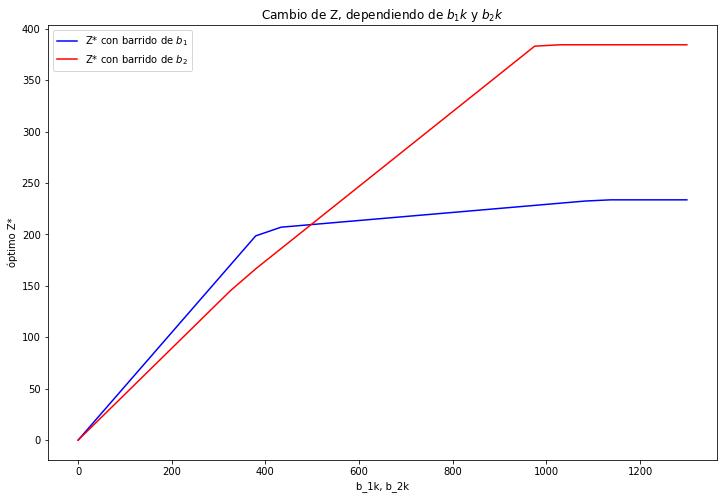

In [67]:
"""Graficamos Z dependiendo de b_1_k y b_2_k"""
plt.subplots(figsize=(12,8))

# Create a line plot
plt.plot(b_1_vec, b1_z_sols, label='Z* con barrido de $b_1$', linestyle='-', color='b')
plt.plot(b_2_vec, b2_z_sols, label='Z* con barrido de $b_2$', linestyle='-', color='r')

# Add labels and title
plt.xlabel('b_1k, b_2k')
plt.ylabel('óptimo Z*')
plt.title('Cambio de Z, dependiendo de $b_1k$ y $b_2k$')

# Add a legend
plt.legend()

# Show the plot
plt.show()

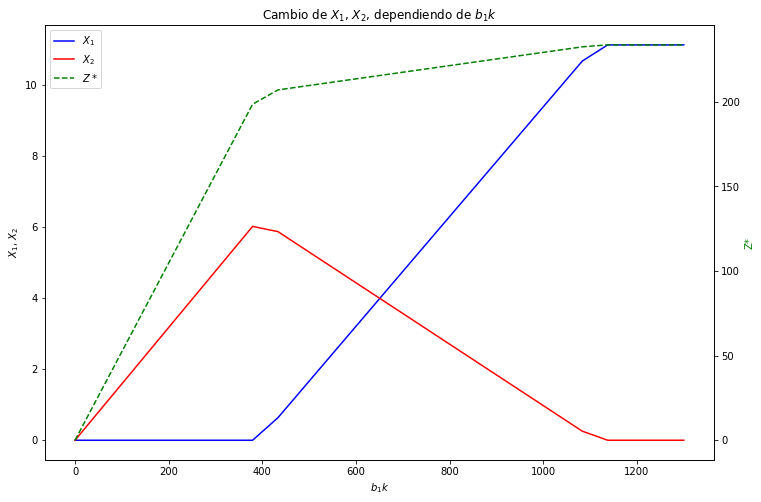

In [74]:
"""Graficamos x_1 y x_2 dependiendo de b_1_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(b_1_vec, b1_x_1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(b_1_vec, b1_x_2_sols, label='$X_2$', linestyle='-', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Secondary axis
ax2 = ax1.twinx()
ax2.plot(b_1_vec, b1_z_sols, label='$Z*$', linestyle='--', color='g')
ax2.set_ylabel('Z*', color='g')

# Add labels and title
plt.title('Cambio de $X_1$, $X_2$, dependiendo de $b_1k$')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.set_xlabel('$b_1k$')

# Show the plot
plt.show()

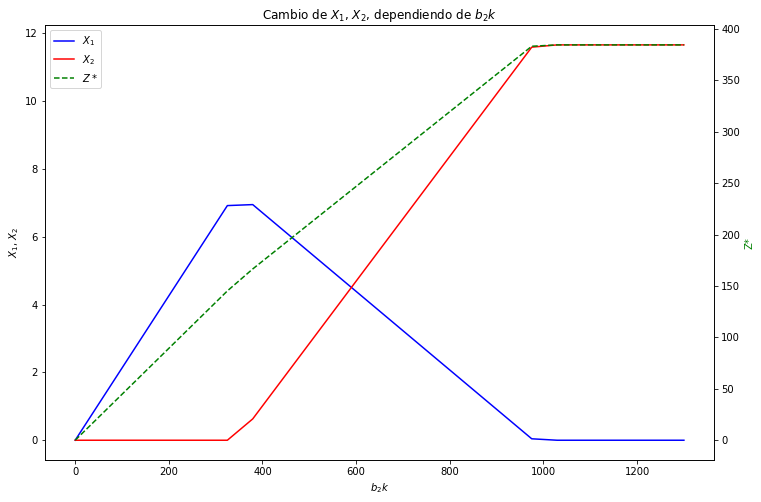

In [75]:
"""Graficamos x_1 y x_2 dependiendo de b_2_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(b_2_vec, b2_x_1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(b_2_vec, b2_x_2_sols, label='$X_2$', linestyle='-', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Secondary axis
ax2 = ax1.twinx()
ax2.plot(b_2_vec, b2_z_sols, label='$Z*$', linestyle='--', color='g')
ax2.set_ylabel('Z*', color='g')

# Add labels and title
plt.title('Cambio de $X_1$, $X_2$, dependiendo de $b_2k$')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.set_xlabel('$b_2k$')

# Show the plot
plt.show()

## Análisis de costo reducido

In [76]:
# Cargamos el problema como una función, y dejamos libres las variables c_1 y c_2:
def problema_optimizacion(c_1, c_2):
    
    lp01 = pulp.LpProblem("Primal", pulp.LpMaximize)

    # Variables:
    x_1 = pulp.LpVariable('x_1', lowBound=0, cat='Continuous')
    x_2 = pulp.LpVariable('x_2', lowBound=0, cat='Continuous')

    # Función objetivo:
    lp01 += c_1*x_1 + c_2*x_2, "Z"

    # Restricciones:
    lp01 +=  100*x_1 + 63*x_2 <= 734
    lp01 +=  47*x_1 + 84*x_2 <= 523

    lp01.solve()
    
    # Costo reducido:
    cr_x1 = x_1.dj
    cr_x2 = x_2.dj
    
    # retornamos Z, x_1 y x_2
    return lp01.objective.value(), x_1.value(), x_2.value(), cr_x1, cr_x2

### Costo reducido con barrido de $c_1$

In [91]:
# Vamos a hacer barrido paramétrico con el parámetro c_1, dejando fijo c_2:
c_1_vec = np.linspace(0, 100, 100)

# Parámetro b_1 fijo:
c_2 = 33

# Listas para guardar resultados.
c1_z_sols = []
c1_x_1_sols = []
c1_x_2_sols = []
c1_cr1_sols = []
c1_cr2_sols = []

# Iteramos por cada b_1_k.
for c_1_k in c_1_vec:
    
    # Resolvemos problema de optimización
    z_k, x_1_k, x_2_k, cr1_k, cr2_k = problema_optimizacion(c_1_k, c_2)
    
    # Append en listas.
    c1_z_sols.append(z_k)
    c1_x_1_sols.append(x_1_k)
    c1_x_2_sols.append(x_2_k)
    c1_cr1_sols.append(cr1_k)
    c1_cr2_sols.append(cr2_k)

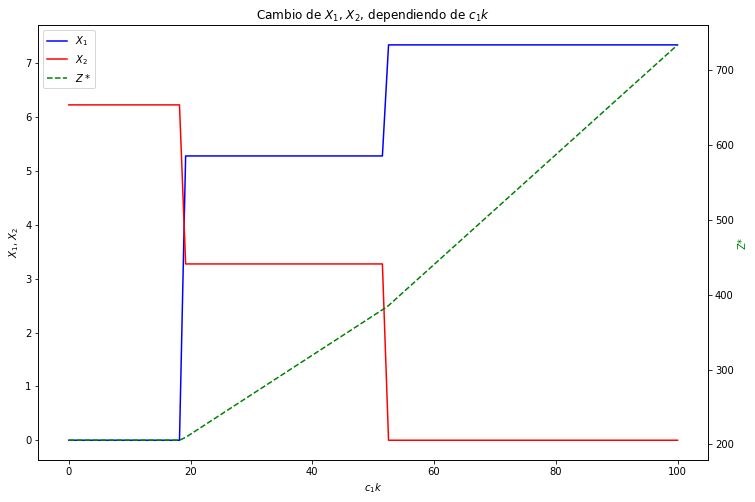

In [92]:
"""Graficamos x_1 y x_2 dependiendo de c_1_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(c_1_vec, c1_x_1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(c_1_vec, c1_x_2_sols, label='$X_2$', linestyle='-', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Secondary axis
ax2 = ax1.twinx()
ax2.plot(c_1_vec, c1_z_sols, label='$Z*$', linestyle='--', color='g')
ax2.set_ylabel('Z*', color='g')

# Add labels and title
plt.title('Cambio de $X_1$, $X_2$, dependiendo de $c_1k$')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.set_xlabel('$c_1k$')

# Show the plot
plt.show()

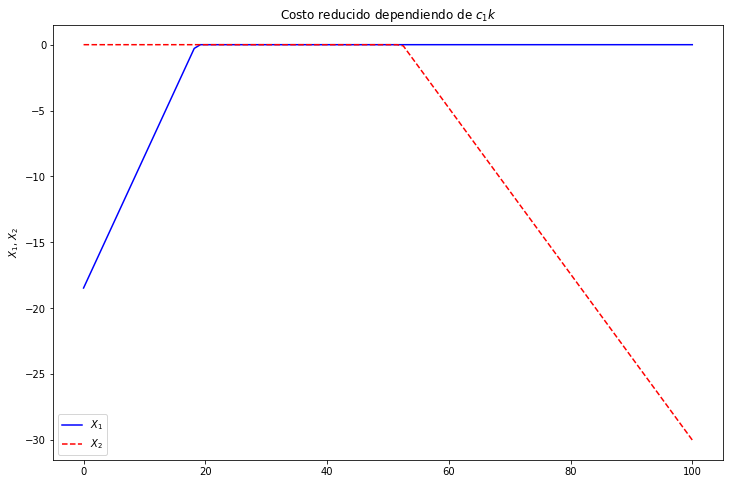

In [93]:
"""Costo reducido dependiendo de c_1_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(c_1_vec, c1_cr1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(c_1_vec, c1_cr2_sols, label='$X_2$', linestyle='--', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Add labels and title
plt.title('Costo reducido dependiendo de $c_1k$')

# Add legend
ax1.legend()

# Show the plot
plt.show()

### Costo reducido con barrido de $c_2$

In [94]:
# Vamos a hacer barrido paramétrico con el parámetro c_1, dejando fijo c_2:
c_2_vec = np.linspace(0, 100, 100)

# Parámetro b_1 fijo:
c_1 = 21

# Listas para guardar resultados.
c2_z_sols = []
c2_x_1_sols = []
c2_x_2_sols = []
c2_cr1_sols = []
c2_cr2_sols = []

# Iteramos por cada b_1_k.
for c_2_k in c_2_vec:
    
    # Resolvemos problema de optimización
    z_k, x_1_k, x_2_k, cr1_k, cr2_k = problema_optimizacion(c_1, c_2_k)
    
    # Append en listas.
    c2_z_sols.append(z_k)
    c2_x_1_sols.append(x_1_k)
    c2_x_2_sols.append(x_2_k)
    c2_cr1_sols.append(cr1_k)
    c2_cr2_sols.append(cr2_k)

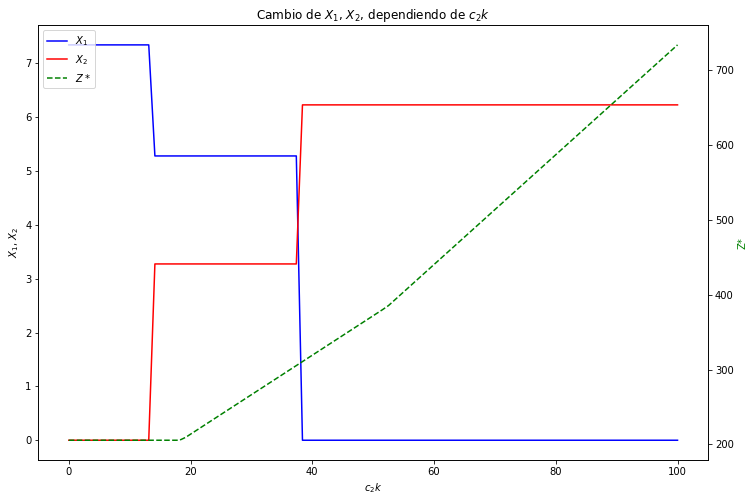

In [95]:
"""Graficamos x_1 y x_2 dependiendo de c_2_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(c_2_vec, c2_x_1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(c_2_vec, c2_x_2_sols, label='$X_2$', linestyle='-', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Secondary axis
ax2 = ax1.twinx()
ax2.plot(c_1_vec, c1_z_sols, label='$Z*$', linestyle='--', color='g')
ax2.set_ylabel('Z*', color='g')

# Add labels and title
plt.title('Cambio de $X_1$, $X_2$, dependiendo de $c_2k$')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.set_xlabel('$c_2k$')

# Show the plot
plt.show()

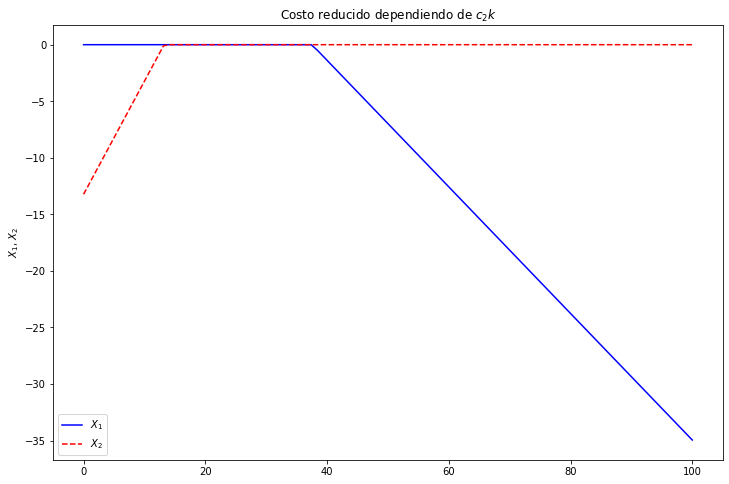

In [96]:
"""Costo reducido dependiendo de c_2_k"""
fig, ax1 = plt.subplots(figsize=(12,8))

# Create a line plot
ax1.plot(c_2_vec, c2_cr1_sols, label='$X_1$', linestyle='-', color='b')
ax1.plot(c_2_vec, c2_cr2_sols, label='$X_2$', linestyle='--', color='r')
ax1.set_ylabel('$X_1$, $X_2$', color='k')

# Add labels and title
plt.title('Costo reducido dependiendo de $c_2k$')

# Add legend
ax1.legend()

# Show the plot
plt.show()